# Autoencoders

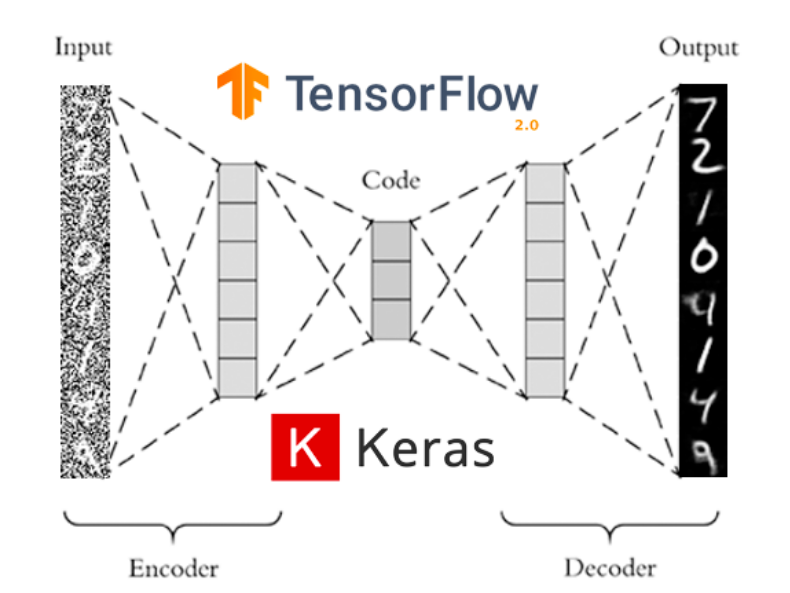

## 1. Autoencoders y espacios latentes con MNIST.


En este proyecto vamos a usar el dataset MNIST para implementar nuestro propio ***AUTOENCODER***, y con él, extraer vectores de nuestro espacio latente. 

También podríamos usar otros datasets como el ***Fashion MNIST*** (de complementos de moda) o ***notMNIST*** (de diferentes tipografías)

---

**Tarea:** Implementar el modelo autoencoder. En este caso construiremos como partes independientes los modelos del ***encoder*** y el ***decoder***, y luego los uniremos para conformar el modelo final: El Autoencoder.

**Pregunta**: ¿Qué función de activación crees que es mejor utilizar en la última capa del ***decoder***: ¿*ReLU*, *Sigmoide* o *Softmax*?¿Por qué?

Una vez este el *autoencoder* construido y funcionando realizar lo siguiente:

1. Hacer que el autoencoder sólo tenga dos neuronas en su cuello de botella y entrenar al modelo. Una vez lo tengas, visualizar una imagen de entrada y el output reconstruido por la red. ¿Es una buena reconstrucción? Si no estás convencido del resultado, comprueba que el autoencoder ha hecho su trabajo, visualizando un ***scatter plot*** donde cada variable latente estará representada en un eje, y donde cada clase esté visualizada de un color. Si el modelo es correcto, se debería observar cómo números de clases similares estarán en posiciones cercanas formando clusters.


In [1]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Cargamos el dataset MNIST.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

X = mnist[:, 1: ]
Y = OneHotEncoder().fit_transform(mnist[:, 0:1]).toarray()

# Escalamos el valor de X
X = X / 255.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *

size = int(np.sqrt(X_train.shape[1]))

z = 16 # Tamaño del vector intermedio del autoencoder.

# Primero creamos el input para el encoder.
inpE = Input(shape=(size, size, 1))     # BSx28x28x1

# Y cambiamos el input a un vector unidimensional.
x = Flatten()(inpE)                     # BSx784
x = Dense(256, activation='relu')(x)    # BSx256
x = Dense(128, activation='relu')(x)    # BSx128
x = Dense(64,  activation='relu')(x)    # BSx64

# La última capa del encoder nos da el vector latente.
c = Dense(z)(x)                         # BSxZ 

# Ahora definimos el input del decoder.
inpD = Input(shape=c.shape[1:])         # BSxZ

# Y empezamos a revertir los pasos del encoder.
x = Dense(64,  activation='relu')(inpD) # BSx64
x = Dense(128, activation='relu')(x)    # BSx128
x = Dense(256, activation='relu')(x)    # BSx256
x = Dense(784, activation='sigmoid')(x) # BSx784

# Finalmente recuperamos la forma original de la imagen.
x = Reshape(inpE.shape[1:])(x)          # BSx28x28x1

" -------- "

# Ahora, para tener el control total de todas las partes del modelo, vamos
# a definir cada parte por separado. 

# El encoder será un modelo cuyo input es
# el input del encoder y el output el código.

# El decoder será un modelo cuyo input es el input
# del decoder y el output la imagen recuperada.
encoder = Model(inputs=inpE, outputs=c)
decoder = Model(inputs=inpD, outputs=x)


# Nos faltaría conectar el encoder con el decoder para formar el autoencoder. 

# (wow. vaya frase!)

# ...y creamos dicho modelo definiendo como input el que acabamos de crear,
# y ojo a cómo conseguimos conectar ambas partes. 

# Contémplalo. Analízalo. Disfrútalo.  
autoencoder = Model(inputs=inpE, outputs=decoder(encoder(inpE)))


# A partir de aquí simplemente compilamos y optimizamos como hacíamos anteriormente.
autoencoder.compile(optimizer=SGD(5), loss='mse')

autoencoder.fit(X_train.reshape(-1, size, size, 1), 
                X_train.reshape(-1, size, size, 1),
                validation_data=(X_test.reshape(-1, size, size, 1), 
                                 X_test.reshape(-1, size, size, 1)),
                epochs=100,
                batch_size=128)

# Cuando hayas terminado de entenderlo, puedes retirar todo el código y
# contemplar las pocas lineas que necesitamos para construir nuestro autoencoder.

Epoch 1/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0874 - val_loss: 0.0677
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0653 - val_loss: 0.0673
Epoch 3/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0631 - val_loss: 0.0618
Epoch 4/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0596 - val_loss: 0.0599
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0554 - val_loss: 0.0536
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.0487
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.0436
Epoch 8/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0428 - val_loss: 0.0444
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0404 - val_loss: 0.0412
Epoch 10/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0382 - val_lo

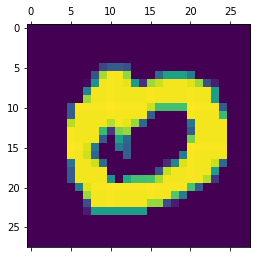

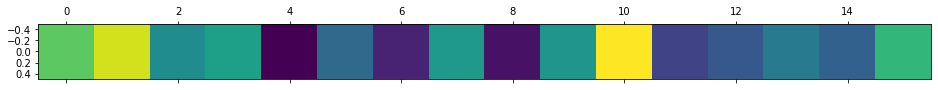

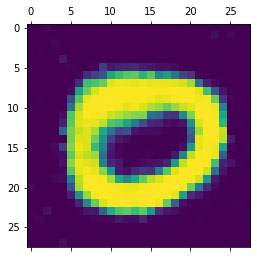

In [3]:
im = 20

plt.matshow(X_test[im:(im+1)].reshape(size, size))
plt.matshow(encoder((X_test[im:(im+1)].reshape(1, size, size, 1))))
plt.matshow(decoder(encoder((X_test[im:(im+1)].reshape(1, size, size, 1))))[0,:,:,0])

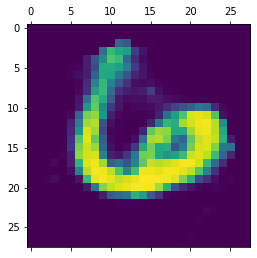

In [10]:
#@title Number fields { run: "auto" }
i = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

idx1 = 250
idx2 = 255         

x1 = X_test.reshape(-1, size, size)[idx1]
x2 = X_test.reshape(-1, size, size)[idx2]

v1 = encoder.predict(x1[np.newaxis, :, :, np.newaxis])
v2 = encoder.predict(x2[np.newaxis, :, :, np.newaxis])

y1 = decoder.predict(v1)
y2 = decoder.predict(v2)

# plt.matshow(x1)
# plt.matshow(x2)
# plt.matshow(y1[0,:,:,0])
# plt.matshow(y2[0,:,:,0])

plt.matshow(decoder.predict((i * v1 + (1 - i) * v2))[0,:,:,0])
plt.show()

## 2. Autoencoder Convolucional.

---

**Tarea:** Utilizar como referencia el ***Autoencoder*** del ejercicio anterior para diseñar ahora un ***Autoencoder Convolucional*** que siga el diseño de la imagen inferior. Para ello se deberán de definir correctamente los parámetros de la capa *Conv2D()* - por ejemplo el parámetro *filters*, *kernel_size* y el *strides* - y comprobar que las dimensiones se ajustan a lo esperado. En este caso, esta arquitectura no hace uso de las capas de ***MaxPooling()***. El uso de este tipo de capas es discutido y podemos tener la misma opción de reducir el tamaño espacial de cada imagen haciendo uso del *stride* de los filtros.

<center><img src="https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@15234372844108/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png" alt="Drawing" width="600px"/></center>

**(Bonus)** Después de diseñar y entrenar al ***Autoencoder Convolucional*** correctamente, experimentar con las siguientes propiedades del modelo:
 

> **1.** *Autoencoder Denoiser :* Generar una imagen con ruido y comprobar que el modelo es capaz de eliminarlo. Probar diferentes con diferentes niveles de ruidos hasta que la reconstrucción no sea posible. En ese punto, probar a añadir ruido al *input* (utilizar la función implementada en proyectos anteriores) y entrenae a el ***autoencoder*** para comprobar si el modelo es capaz de actuar como un *denoiser*.

> **2.** *Interpolaciones :* Generar vectores latentes para dos tipos de imágenes y visualízalas. Después hacer la interpolación matemática entre los dos vectores, para diferentes grados de mezcla, y con los vectores resultantes, reconstruir las imágenes con el *Decoder()*. ¿Se produce algún tipo de interpolación? ¿Se te ocurre otro tipo de red que pudiera generar interpolaciones de mejor calidad?


In [11]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Cargamos el dataset MNIST.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

size = 28
X = mnist[:, 1: ].reshape(-1, size, size, 1)
Y = OneHotEncoder().fit_transform(mnist[:, 0:1]).toarray()

# Escalamos el valor de X
X = X / 255.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [12]:
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

z = 10

# Capa de entrada.       Shape = BSx28x28x1
iE = Input((size, size, 1))
# 1ª Capa convolucional. Shape = BSx14x14x32
x = Conv2D(filters=32,  kernel_size=3, strides=2, padding='same', activation='relu')(iE)
# 2ª Capa convolucional. Shape = BSx7x7x64
x = Conv2D(filters=64,  kernel_size=3, strides=2, padding='same', activation='relu')(x)
# 3ª Capa convolucional. Shape = BSx14x14x128
x = Conv2D(filters=128, kernel_size=3, strides=2, activation='relu')(x)
# Capa densa.            Shape = BSx1152
x = Flatten()(x)
c = Dense(units=z, activation='relu')(x)

enc = Model(inputs=iE, outputs=c)

iD = Input(z)
# Capa densa.           
x = Dense(units=1152, activation='relu')(iD)
# Reformateo de la capa densa.
x = Reshape((enc.layers[-3].output_shape[1:]))(x)
# 
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu')(x)
#
x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation='relu')(x)
#
x = Conv2DTranspose(filters=1,  kernel_size=3, strides=2, padding="same", activation='sigmoid')(x)

# Creación de la parte del decoder.
dec = Model(inputs=iD, outputs=x)

# Creación del modelo final del autoencoder. 
aut = Model(inputs=iE, outputs=dec(enc(iE)))

aut.compile(optimizer=Adam(lr=0.001), loss='mse')
h1 = aut.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=25, batch_size=16)

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0534 - val_loss: 0.0293
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 0.0275 - val_loss: 0.0267
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 0.0252 - val_loss: 0.0245
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 0.0237 - val_loss: 0.0237
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0215 - val_loss: 0.0207
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0199 - val_loss: 0.0198
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 0.0190 - val_loss: 0.0192
Epoch 8/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0184 - val_loss: 0.0184
Epoch 9/25
938/938 [==============================] - 3s 4ms/step - loss: 0.0178 - val_loss: 0.0183
Epoch 10/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0173 - val_loss: 0.0180

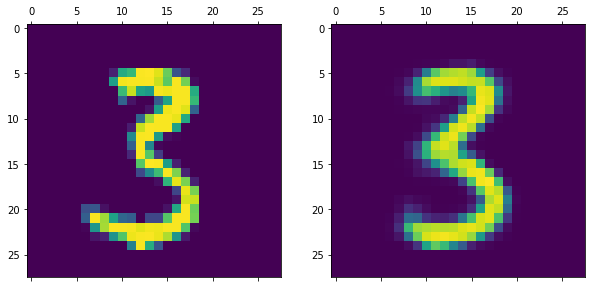

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10, 10))

im = 0

axs[0].matshow(X_train[im,:,:,0])
axs[1].matshow(aut.predict(X_train)[0,:,:,0])

(-0.5, 27.5, 27.5, -0.5)

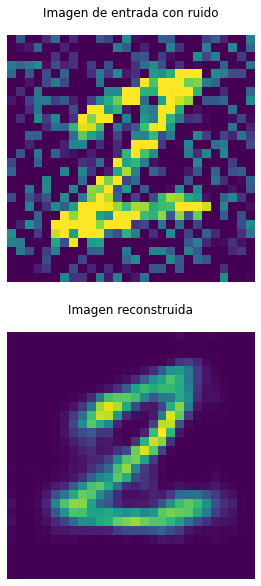

In [23]:
from tensorflow.keras.preprocessing.image import *

i = 0
f = 0.25

def add_noise(img, f):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * f
    img = np.clip(img + noise, 0., 1.)
    return img

# Generador de imágenes al 50%
n50_datagen = ImageDataGenerator(preprocessing_function=lambda x: add_noise(x, 0.50))

fig, axs = plt.subplots(2, 1, figsize=(5, 10))
fig.tight_layout = True

# Generamos una imagen con ruido.
img = next(n50_datagen.flow(X_test))
# Visualizamos la imagen generada.
axs[0].matshow(img[0,:,:,0])
axs[0].set_title('Imagen de entrada con ruido')
axs[0].axis('off')
# Visualizamos la imagen reconstruida por el autoencoder.
axs[1].matshow(aut.predict(img)[0,:,:,0])
axs[1].set_title('Imagen reconstruida')
axs[1].axis('off')

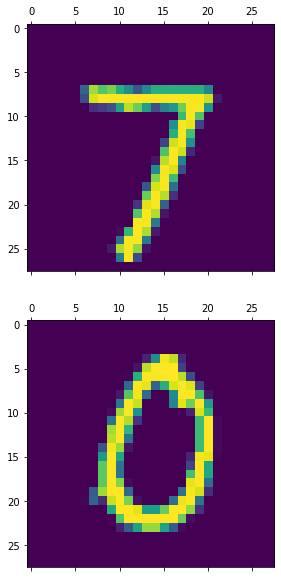

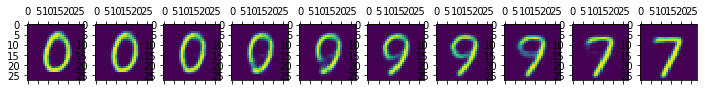

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
fig.tight_layout = True

# Generamos una imagen con ruido.
img1 = X_test[0:1].reshape(1, 28, 28, 1)
# Generamos una imagen con ruido.
img2 = X_test[4:5].reshape(1, 28, 28, 1)

# Visualizamos la imagen generada.
axs[0].matshow(img1[0,:,:,0])
axs[1].matshow(img2[0,:,:,0])

cod1 = enc(img1)
cod2 = enc(img2)


fig, axs = plt.subplots(1, 10, figsize=(12, 12))

for i in range(10):

  f = i / 10
  codM = cod1 * f + cod2 * (1 - f)
  imgM = dec(codM)
  axs[i].matshow(imgM[0,:,:,0])